/usr/local/lib/python3.11/dist-packages/scipy/signal/_filter_design.py:481: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/usr/local/lib/python3.11/dist-packages/scipy/signal/_filter_design.py:481: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
<ipython-input-8-b8caf3284b00>:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_fir / np.pi, 20 * np.log10(abs(h_fir)), label='FIR Filter')


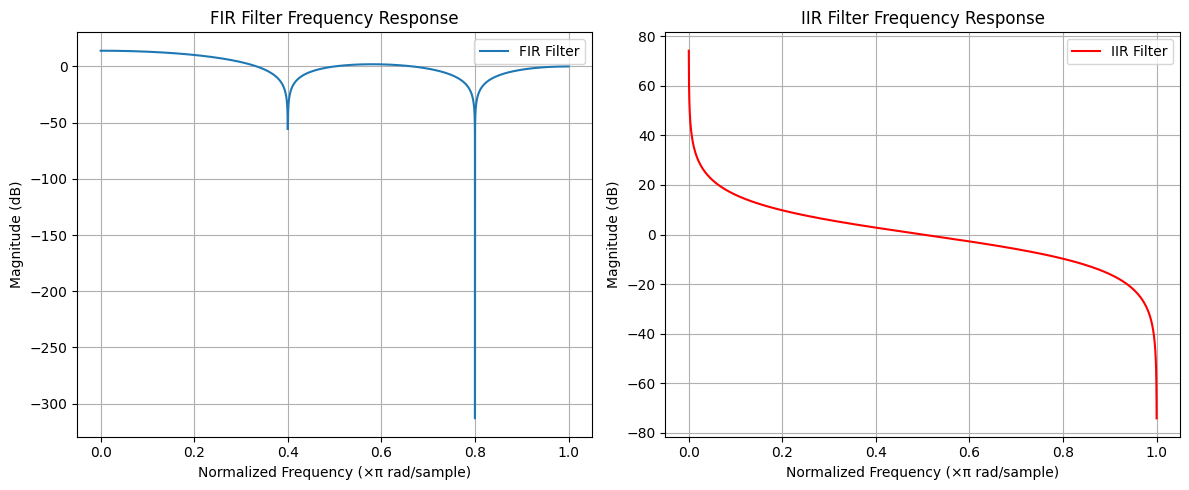

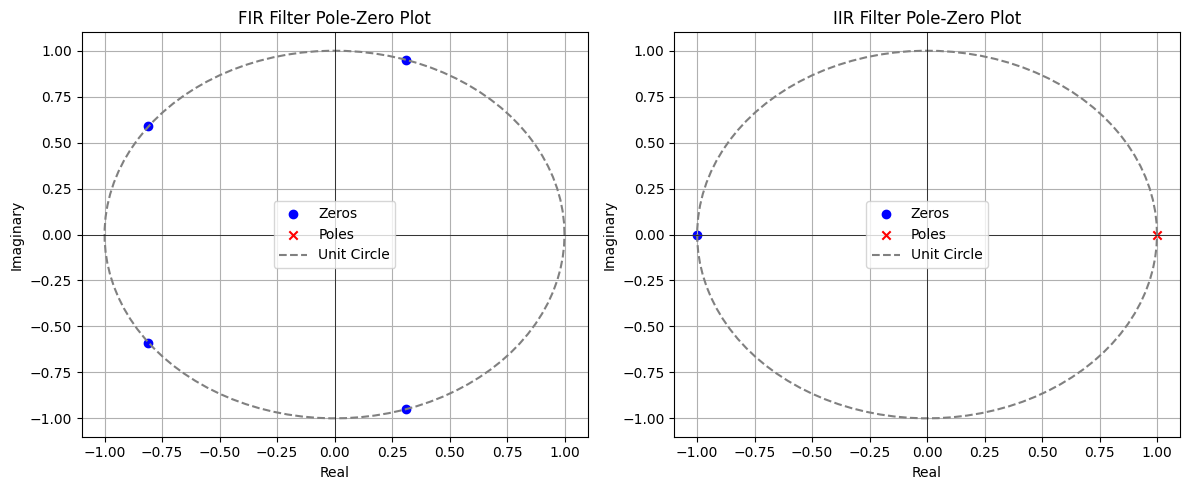

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# FIR filter coefficients: H(z) = 1 + z^-1 + z^-2 + z^-3 + z^-4
fir_coeffs = [1, 1, 1, 1, 1]  # Coefficients for FIR filter (numerator)
fir_den = [1]  # FIR filters have no denominator (except a constant)

# IIR filter coefficients: H(z) = (1 + z^-1) / (1 - z^-1)
iir_num = [1, 1]  # Numerator coefficients (1 + z^-1)
iir_den = [1, -1]  # Denominator coefficients (1 - z^-1)

# Compute frequency responses
w_fir, h_fir = freqz(fir_coeffs, fir_den, worN=8000)
w_iir, h_iir = freqz(iir_num, iir_den, worN=8000)

# Compute poles and zeros
zeros_fir, poles_fir, _ = tf2zpk(fir_coeffs, fir_den)
zeros_iir, poles_iir, _ = tf2zpk(iir_num, iir_den)

# Plot Frequency Responses
plt.figure(figsize=(12, 5))

# FIR Filter Frequency Response
plt.subplot(1, 2, 1)
plt.plot(w_fir / np.pi, 20 * np.log10(abs(h_fir)), label='FIR Filter')
plt.title("FIR Filter Frequency Response")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.legend()

# IIR Filter Frequency Response
plt.subplot(1, 2, 2)
plt.plot(w_iir / np.pi, 20 * np.log10(abs(h_iir)), label='IIR Filter', color='red')
plt.title("IIR Filter Frequency Response")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Plot Pole-Zero Diagrams
plt.figure(figsize=(12, 5))

# FIR Filter Pole-Zero Plot
plt.subplot(1, 2, 1)
plt.scatter(np.real(zeros_fir), np.imag(zeros_fir), marker='o', label='Zeros', color='blue')
plt.scatter(np.real(poles_fir), np.imag(poles_fir), marker='x', label='Poles', color='red')
circle = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(circle), np.sin(circle), linestyle='--', color='gray', label='Unit Circle')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("FIR Filter Pole-Zero Plot")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()

# IIR Filter Pole-Zero Plot
plt.subplot(1, 2, 2)
plt.scatter(np.real(zeros_iir), np.imag(zeros_iir), marker='o', label='Zeros', color='blue')
plt.scatter(np.real(poles_iir), np.imag(poles_iir), marker='x', label='Poles', color='red')
plt.plot(np.cos(circle), np.sin(circle), linestyle='--', color='gray', label='Unit Circle')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("IIR Filter Pole-Zero Plot")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
poles_iir

array([1.])

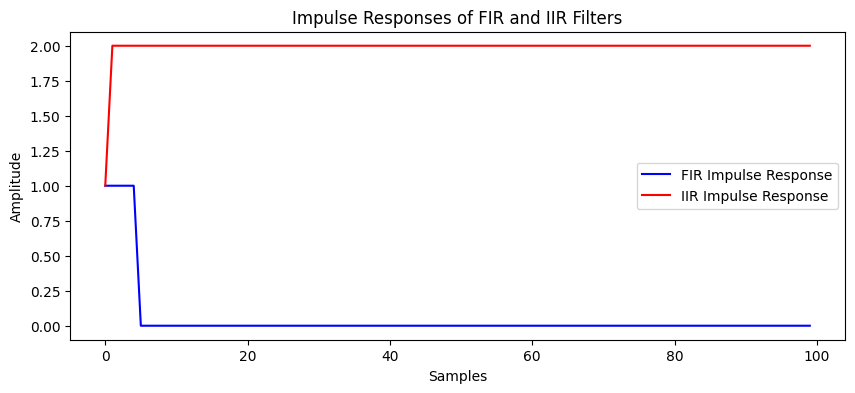

In [ ]:
from scipy.signal import lfilter
iimpulse = np.zeros(100)
iimpulse[0] = 1

FIR_response = lfilter(fir_coeffs, fir_den, iimpulse)
IIR_response = lfilter(iir_num, iir_den, iimpulse)

plt.figure(figsize=(10, 4))
plt.plot(FIR_response, label='FIR Impulse Response', color='blue')
plt.plot(IIR_response, label='IIR Impulse Response', color='red')
plt.title('Impulse Responses of FIR and IIR Filters')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

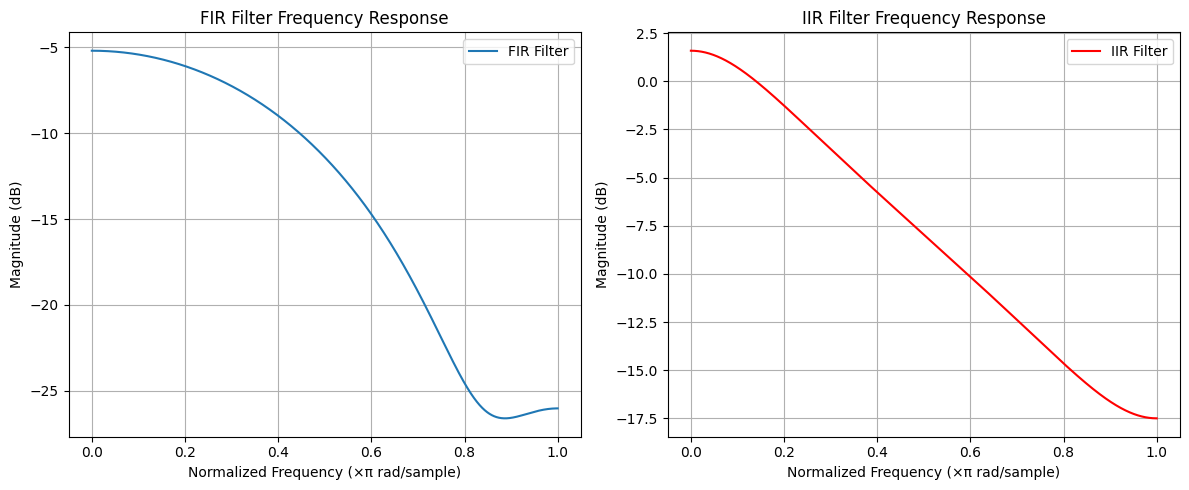

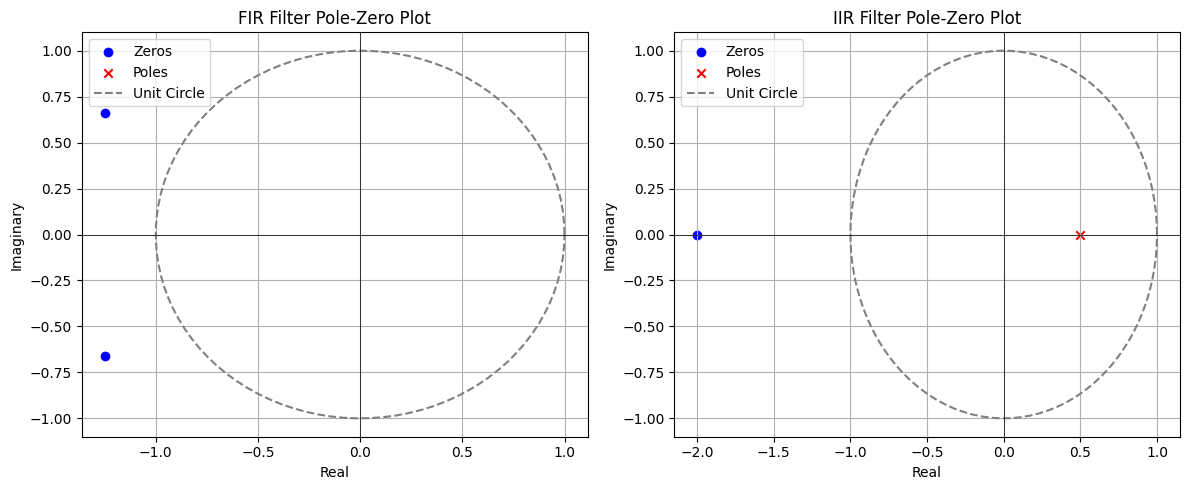

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# FIR filter coefficients: H(z) = 0.1 + 0.25*z^-1 + 0.2*z^-2
fir_coeffs = [0.1, 0.25, 0.2]  # Coefficients for FIR filter (numerator)
fir_den = [1]  # FIR filters have no denominator (except a constant)

# IIR filter coefficients: H(z) = (0.2 + 0.4*z^-1) / (1 - 0.5*z^-1)
iir_num = [0.2, 0.4]  # Numerator coefficients (0.2 + 0.4*z^-1)
iir_den = [1, -0.5]  # Denominator coefficients (1 - 0.5*z^-1)

# Compute frequency responses
w_fir, h_fir = freqz(fir_coeffs, fir_den, worN=8000)
w_iir, h_iir = freqz(iir_num, iir_den, worN=8000)

# Compute poles and zeros
zeros_fir, poles_fir, _ = tf2zpk(fir_coeffs, fir_den)
zeros_iir, poles_iir, _ = tf2zpk(iir_num, iir_den)

# Plot Frequency Responses
plt.figure(figsize=(12, 5))

# FIR Filter Frequency Response
plt.subplot(1, 2, 1)
plt.plot(w_fir / np.pi, 20 * np.log10(abs(h_fir)), label='FIR Filter')
plt.title("FIR Filter Frequency Response")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.legend()

# IIR Filter Frequency Response
plt.subplot(1, 2, 2)
plt.plot(w_iir / np.pi, 20 * np.log10(abs(h_iir)), label='IIR Filter', color='red')
plt.title("IIR Filter Frequency Response")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Plot Pole-Zero Diagrams
plt.figure(figsize=(12, 5))

# FIR Filter Pole-Zero Plot
plt.subplot(1, 2, 1)
plt.scatter(np.real(zeros_fir), np.imag(zeros_fir), marker='o', label='Zeros', color='blue')
plt.scatter(np.real(poles_fir), np.imag(poles_fir), marker='x', label='Poles', color='red')
circle = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(circle), np.sin(circle), linestyle='--', color='gray', label='Unit Circle')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("FIR Filter Pole-Zero Plot")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()

# IIR Filter Pole-Zero Plot
plt.subplot(1, 2, 2)
plt.scatter(np.real(zeros_iir), np.imag(zeros_iir), marker='o', label='Zeros', color='blue')
plt.scatter(np.real(poles_iir), np.imag(poles_iir), marker='x', label='Poles', color='red')
plt.plot(np.cos(circle), np.sin(circle), linestyle='--', color='gray', label='Unit Circle')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("IIR Filter Pole-Zero Plot")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
poles_iir

array([0.5])